# Part II - (ford go bike system)
## by (Bader Ababtain)

## Investigation Overview



## Dataset Overview and Executive Summary

  look at how the duration of trips changes with respect to DateTime and customer type and member gender. THE focus was ,days of the week and customer type.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")
import datetime as dt

In [2]:
# load in the dataset into a pandas dataframe
df=pd.read_csv('201902-fordgobike-tripdata.csv')

In [3]:
df.dropna(inplace=True)

df['start_time'] = pd.to_datetime(df['start_time'])
df['end_time'] = pd.to_datetime(df['end_time'])

df['bike_id'] =df.bike_id.astype(str)


import datetime as dt
df['start_day'] = df['start_time'].dt.day_name()
df['start_month'] = df['start_time'].dt.month_name()
# bike['start_year'] = bike['start_time'].dt.year
df['start_hr'] = df['start_time'].dt.hour

df['end_day'] = df['end_time'].dt.day_name()
df['end_month'] = df['end_time'].dt.month_name()
df['end_hr'] = df['end_time'].dt.hour


## Distribution of Rides by User Type
Subscribers account for over 90% of the total rides

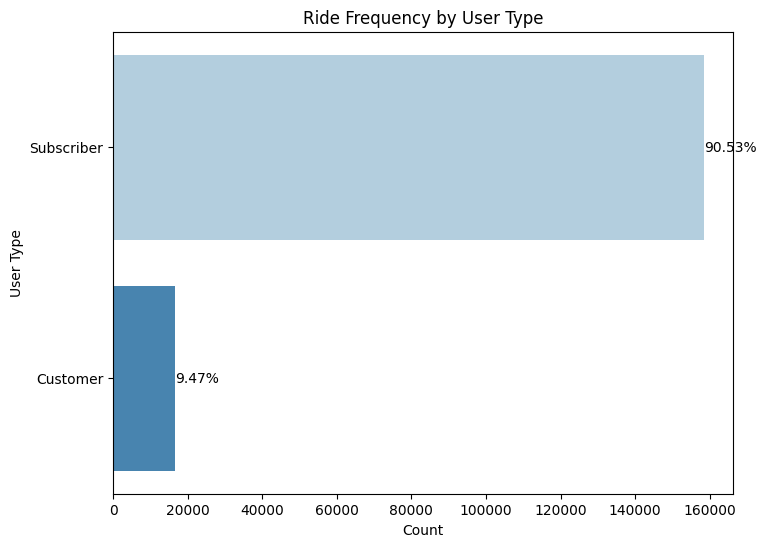

In [4]:
# Create the count plot
# Calculate the counts and percentages for each user type
user_type_counts = df['user_type'].value_counts()
user_type_percentages = (user_type_counts / len(df)) * 100

# Create a figure
plt.figure(figsize=(8, 6))

# Create a horizontal bar plot
sns.barplot(x=user_type_counts.values, y=user_type_counts.index, palette='Blues')

# Add percentages to the bars
for index, value in enumerate(user_type_counts):
    plt.text(value + 2, index, f'{user_type_percentages[index]:.2f}%', va='center')

# Set axis labels and title
plt.xlabel('Count')
plt.ylabel('User Type')
plt.title('Ride Frequency by User Type')

# Display the plot
plt.show()

Subscribers account for over 90% of the total rides

## (Duration based on user_type and member_gender and bike sahe


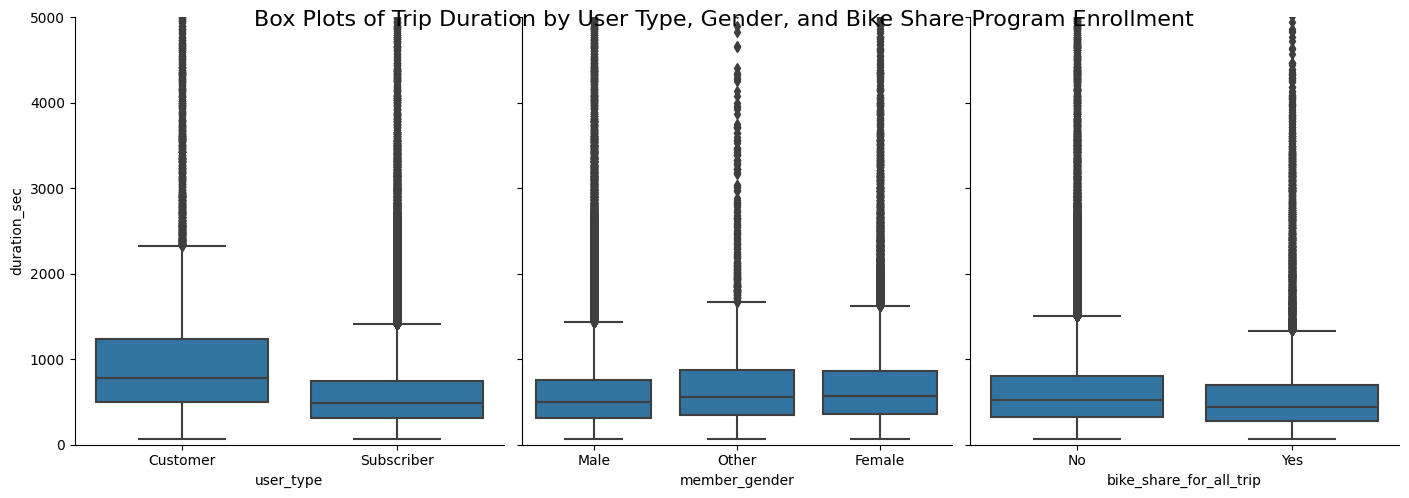

In [5]:
g = sns.PairGrid(data=df, y_vars='duration_sec', x_vars=['user_type', 'member_gender', 'bike_share_for_all_trip'], height=5, aspect=1.5)
g.map(sns.boxplot, color=sns.color_palette()[0])
plt.ylim([0, 5000])
# Set the title
plt.suptitle("Box Plots of Trip Duration by User Type, Gender, and Bike Share Program Enrollment", fontsize=16)
g.fig.set_size_inches(14,5);
plt.show()


it appears that customers spend more time on average compare to subscribers while the female gender spend higher time on average than male.

Bike share for all trip tends to be similar on average across all types .

Trip Duration across Days and year

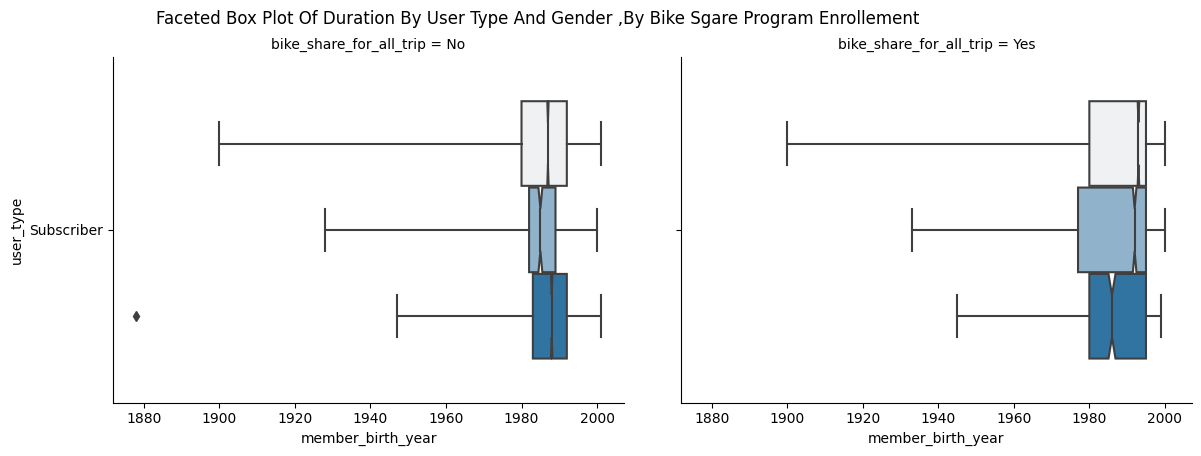

In [6]:
# Create a scatter plot of trip duration vs. start hour
 #facet plot
g=sns.FacetGrid(data=df,col='bike_share_for_all_trip')
#the indvidual subplots (facets)
g.map(sns.boxplot,"member_birth_year","user_type","member_gender",whis=10,dodge=True,width=0.75,notch=True)
plt.suptitle("Faceted box plot of Duration by user type and gender ,by bike Sgare program enrollement".title())
g.fig.set_size_inches(14,5);

Age group between (25years - 40years) appear to be the popular users